In [36]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('seattle-weather.csv')

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
df.drop_duplicates(inplace=True)

# Check for anomalies in temperature values
print("Temperature values:\n", df[['temp_max', 'temp_min']].describe())

# Detect outliers (example using IQR for temperature)
Q1 = df[['temp_max', 'temp_min']].quantile(0.25)
Q3 = df[['temp_max', 'temp_min']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[['temp_max', 'temp_min']] < (Q1 - 1.5 * IQR)) | (df[['temp_max', 'temp_min']] > (Q3 + 1.5 * IQR))).sum()
print(f"Outliers detected:\n{outliers}")

# Keep only necessary columns
df = df[['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather']]

# Check the cleaned data
print(df.head())

Missing values:
 date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64
Duplicate rows: 0
Temperature values:
           temp_max     temp_min
count  1461.000000  1461.000000
mean     16.439083     8.234771
std       7.349758     5.023004
min      -1.600000    -7.100000
25%      10.600000     4.400000
50%      15.600000     8.300000
75%      22.200000    12.200000
max      35.600000    18.300000
Outliers detected:
temp_max    0
temp_min    0
dtype: int64
        date  precipitation  temp_max  temp_min  wind  weather
0 2012-01-01            0.0      12.8       5.0   4.7  drizzle
1 2012-01-02           10.9      10.6       2.8   4.5     rain
2 2012-01-03            0.8      11.7       7.2   2.3     rain
3 2012-01-04           20.3      12.2       5.6   4.7     rain
4 2012-01-05            1.3       8.9       2.8   6.1     rain


In [37]:
# Feature 1: Temperature Range
df['temp_range'] = df['temp_max'] - df['temp_min']

In [38]:
# Feature 2: Precipitation Intensity
def classify_precipitation(precip):
    if precip == 0:
        return 'None'
    elif precip < 2.5:
        return 'Light'
    elif precip < 7.6:
        return 'Moderate'
    else:
        return 'Heavy'

df['precip_intensity'] = df['precipitation'].apply(classify_precipitation)

In [39]:
# Feature 3: Season
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['date'].apply(get_season)

In [40]:
# Feature 3: Season
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['date'].apply(get_season)

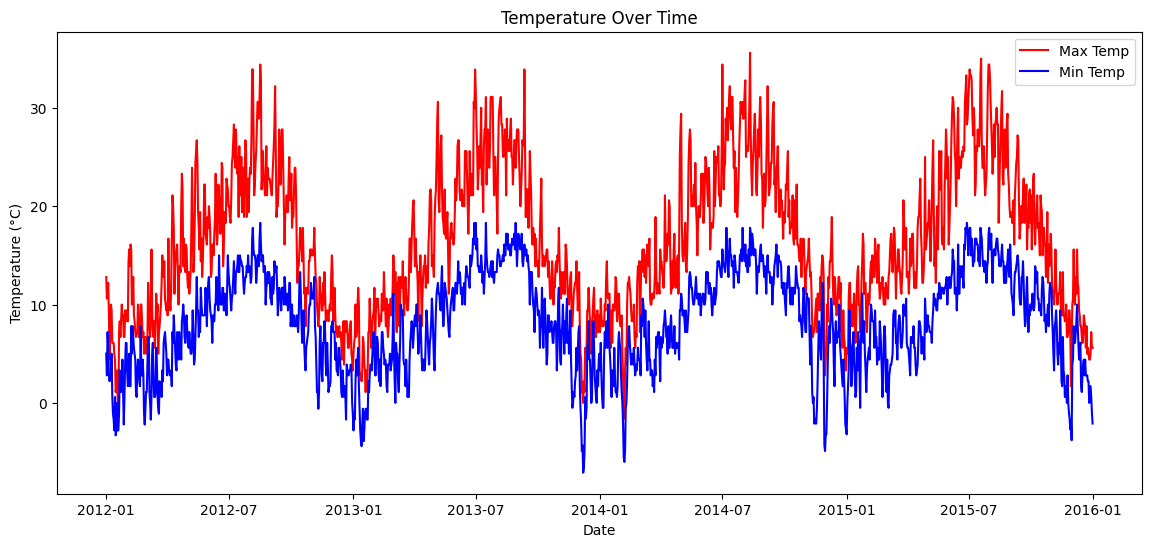

In [41]:
import matplotlib.pyplot as plt

# Temperature over time
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['temp_max'], label='Max Temp', color='r')
plt.plot(df['date'], df['temp_min'], label='Min Temp', color='b')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

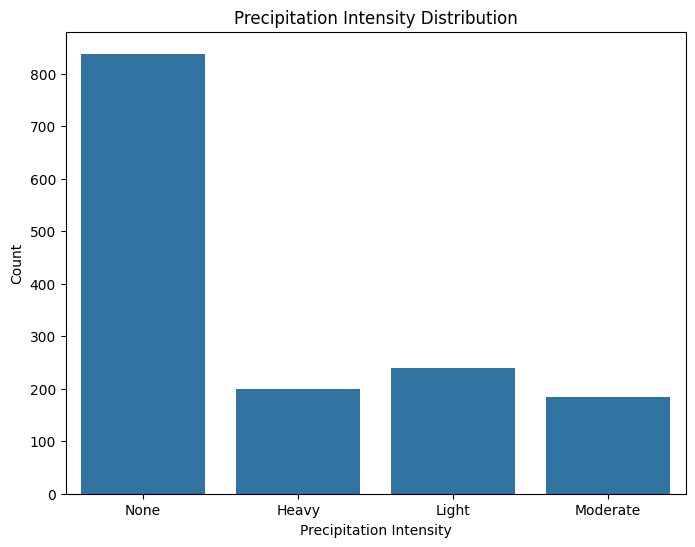

In [42]:
import seaborn as sns

# Precipitation intensity distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='precip_intensity', data=df)
plt.title('Precipitation Intensity Distribution')
plt.xlabel('Precipitation Intensity')
plt.ylabel('Count')
plt.show()

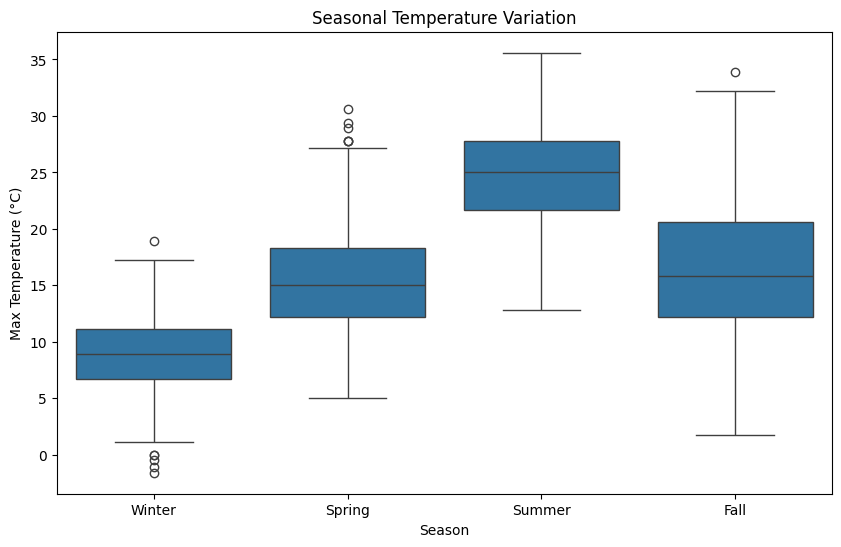

In [43]:
# Seasonal temperature variation
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='temp_max', data=df)
plt.title('Seasonal Temperature Variation')
plt.xlabel('Season')
plt.ylabel('Max Temperature (°C)')
plt.show()

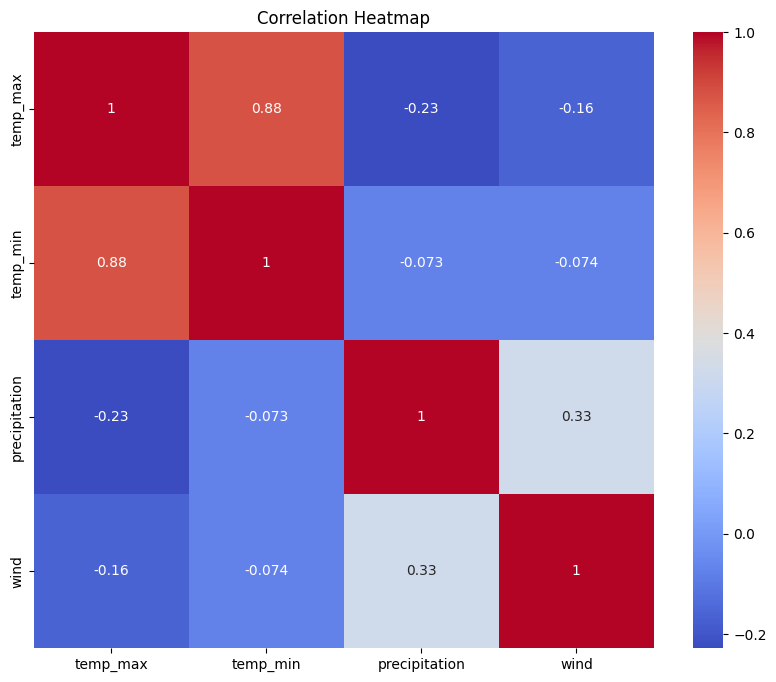

In [44]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df[['temp_max', 'temp_min', 'precipitation', 'wind']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the CSV file
df = pd.read_csv('seattle-weather.csv')

# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Feature Engineering
df['temp_range'] = df['temp_max'] - df['temp_min']
df['season'] = df['date'].apply(get_season)
df = pd.get_dummies(df, columns=['season', 'weather'])

# Define features and target
X = df[['temp_max', 'temp_min', 'precipitation', 'wind', 'temp_range', 'season_Fall', 'season_Spring', 'season_Summer', 'season_Winter']]
y = df['weather_rain']  # Example target: predicting if the weather is 'rain'

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9419795221843004
Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.97      0.95       173
        True       0.95      0.91      0.93       120

    accuracy                           0.94       293
   macro avg       0.94      0.94      0.94       293
weighted avg       0.94      0.94      0.94       293



In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.960620042625184


In [48]:
from sklearn.model_selection import cross_val_score

# Initialize the model with best parameters from GridSearchCV
best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(best_rf, X, y, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.87030717 0.92123288 0.98630137 0.99657534 1.        ]
Mean CV score: 0.9548833512553181


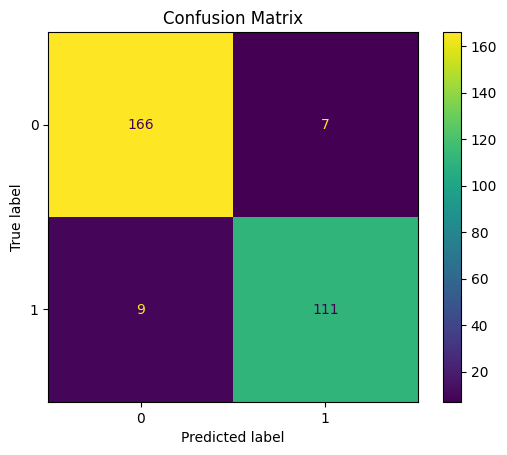

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Fit the model with the entire training data
best_rf.fit(X_train, y_train)

# Make predictions
y_pred = best_rf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

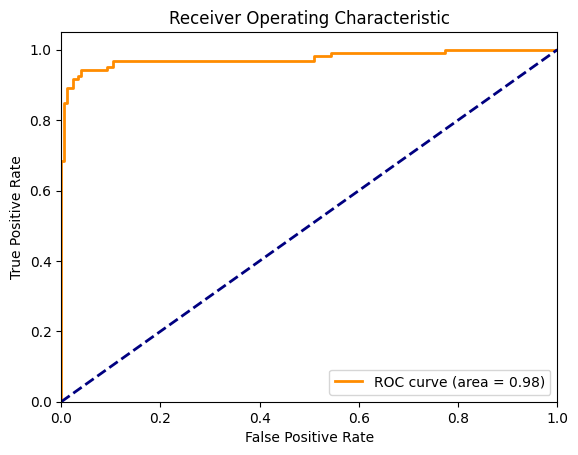

In [50]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, best_rf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Feature ranking:
1. feature precipitation (0.7232426422754317)
2. feature temp_range (0.10866577518698292)
3. feature temp_max (0.0672872629071566)
4. feature temp_min (0.05398662657791285)
5. feature wind (0.03282258281712803)
6. feature season_Summer (0.007138047328201265)
7. feature season_Winter (0.00285851914638787)
8. feature season_Fall (0.0021955989862321814)
9. feature season_Spring (0.001802944774566658)


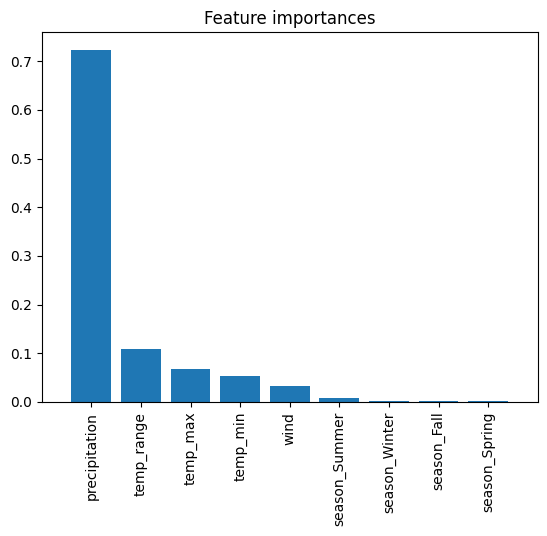

In [52]:
import numpy as np
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f + 1}. feature {X.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print performance metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.95
Precision: 0.94
Recall: 0.93
F1 Score: 0.93


In [54]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb = GradientBoostingClassifier(random_state=42)

# Train the model
gb.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb.predict(X_test)

# Evaluate the model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.9385665529010239


In [55]:
from sklearn.svm import SVC

# Initialize the model
svm = SVC(probability=True, random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.8737201365187713


In [56]:
import joblib

# Save the model to a file
joblib.dump(best_rf, 'weather_model.pkl')

['weather_model.pkl']

In [57]:
# Load the model from the file
loaded_model = joblib.load('weather_model.pkl')

# Use the loaded model to make predictions
sample_data = X_test.iloc[0:1]  # Example: using the first sample from the test set
prediction = loaded_model.predict(sample_data)
print("Prediction for sample data:", prediction)

Prediction for sample data: [False]


In [58]:
# Summarize findings
summary = {
    "Best Model": "Random Forest",
    "Best Parameters": grid_search.best_params_,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Print summary
for key, value in summary.items():
    print(f"{key}: {value}")

Best Model: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.9453924914675768
Precision: 0.940677966101695
Recall: 0.925
F1 Score: 0.9327731092436975
